## 📊 Notebook 4: Machine Learning Predictions Notebook

#### Goal: Using Machine Learning models to predict the churn rate before and after applying retention strategies.

### Baseline Modelling

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Scikit-Learn ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Load Cleaned Dataset
df_model = pd.read_csv('../data/final_preprocessed_telco_churn.csv')

df_model.head()


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,BillToTenureRatio,HighValueRiskCustomer,LongTermLowSpender
0,0,1,0,-1.280248,0,1,0,0,0,0,...,True,False,False,False,False,True,False,1.298395,0,0
1,0,0,0,0.064303,1,0,1,0,0,0,...,False,True,False,False,False,False,True,-0.424753,0,0
2,0,0,0,-1.239504,1,1,0,0,0,0,...,True,False,False,False,False,False,True,1.119505,0,0
3,0,0,0,0.512486,1,0,1,1,0,0,...,False,True,False,True,False,False,False,-0.469704,0,0
4,0,0,0,-1.239504,0,0,0,0,0,0,...,True,False,False,False,False,True,False,1.634768,0,0


In [8]:
# Separate features and target
X = df_model.drop(['Churn_binary'], axis=1)
y = df_model['Churn_binary']

# Stratify ensures same proportion of churn in both train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (5625, 27), Testing Data: (1407, 27)


Target variable = Churn_binary.

stratify=y maintains balanced churn ratio.

80% train, 20% test is standard.

In [9]:
# Initialize model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]


Logistic Regression = simplest model for binary classification (churn vs. no churn).

No hyperparameter tuning yet — this is the base benchmark.

predict() gives binary prediction; predict_proba() gives churn probability.

In [10]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy Score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# ROC AUC Score
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

import numpy as np

total_customers = len(y_pred)
churned_customers = np.sum(y_pred == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")

actual_churn_percentage = (np.sum(y_test == 1) / len(y_test)) * 100
print(f"Actual Churn Rate in Test Set: {actual_churn_percentage:.2f}%")





Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407


Confusion Matrix:
 [[920 113]
 [176 198]]

Accuracy Score: 0.7945984363894811

ROC AUC Score: 0.8377007935973826
Predicted Churn Rate: 22.10%
Actual Churn Rate in Test Set: 26.58%


Classification Report: Precision, Recall, F1-score explained.

Confusion Matrix: True/False Positives & Negatives.

Accuracy: Overall correct prediction rate.

ROC AUC: Probability model’s ability to separate churn vs non-churn customers.

Classification Report
Metric	Class 0 (No Churn)	Class 1 (Churn)	Meaning
Precision	0.84	0.64	Of predicted class, how many were correct. Churn predictions are ~64% accurate.
Recall	0.89	0.53	Of actual churners, model only catches ~53%.
F1-score	0.86	0.58	Balance between Precision and Recall; F1 for churn is a bit low.
Support	1033	374	Data imbalance — fewer churners than non-churners.

Summary:

Model is better at predicting non-churners (Class 0).

Model struggles more with actual churners (Class 1) — recall of 0.53 means it's only catching 53% of them.

🎯 Confusion Matrix
Predicted No Churn	Predicted Churn
Actual No Churn	920	113
Actual Churn	176	198

920 customers correctly predicted as non-churners (True Negatives).

198 churners correctly predicted (True Positives).

113 false positives (predicted churn but didn't churn).

176 false negatives (actual churn but predicted no churn).

👉 Main Issue: The model misses 176 actual churners = False Negatives are high.

🎯 Accuracy (79%)
Means your model is overall correct 79% of the time.

BUT accuracy can be misleading in imbalanced datasets (more non-churners).

🎯 ROC AUC Score: 0.83
Excellent separation ability between churn vs non-churn.

Closer to 1 = better. Above 0.80 = solid for baseline.


#### Random Forest model

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_pred_prob = rf_clf.predict_proba(X_test)[:, 1]

# Classification Report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred))   
# Confusion Matrix
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Accuracy Score
print("\nRandom Forest Accuracy Score:", accuracy_score(y_test, y_pred))
# ROC AUC Score
print("\nRandom Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

import numpy as np

total_customers = len(y_pred)
churned_customers = np.sum(y_pred == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")

actual_churn_percentage = (np.sum(y_test == 1) / len(y_test)) * 100
print(f"Actual Churn Rate in Test Set: {actual_churn_percentage:.2f}%")


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407


Random Forest Confusion Matrix:
 [[903 130]
 [188 186]]

Random Forest Accuracy Score: 0.7739872068230277

Random Forest ROC AUC Score: 0.8140158201800477
Predicted Churn Rate: 22.46%
Actual Churn Rate in Test Set: 26.58%


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# ✅ Model Initialization
dt_clf = DecisionTreeClassifier(random_state=42)

# ✅ Model Training
dt_clf.fit(X_train, y_train)

# ✅ Predictions
y_pred_dt = dt_clf.predict(X_test)
y_pred_prob_dt = rf_clf.predict_proba(X_test)[:, 1]

# ✅ Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_dt))

import numpy as np

total_customers = len(y_pred_dt)
churned_customers = np.sum(y_pred_dt == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")

actual_churn_percentage = (np.sum(y_test == 1) / len(y_test)) * 100
print(f"Actual Churn Rate in Test Set: {actual_churn_percentage:.2f}%")


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1033
           1       0.48      0.47      0.48       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407

Confusion Matrix:
 [[842 191]
 [198 176]]
Accuracy Score: 0.7235252309879175
ROC AUC Score: 0.8140158201800477
Predicted Churn Rate: 26.08%
Actual Churn Rate in Test Set: 26.58%


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Initialize XGBoost
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]))

import numpy as np

total_customers = len(y_pred_xgb)
churned_customers = np.sum(y_pred_xgb == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")

actual_churn_percentage = (np.sum(y_test == 1) / len(y_test)) * 100
print(f"Actual Churn Rate in Test Set: {actual_churn_percentage:.2f}%")


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407

Confusion Matrix:
 [[890 143]
 [180 194]]
Accuracy Score: 0.7704335465529495
ROC AUC Score: 0.8151715319587308
Predicted Churn Rate: 23.95%
Actual Churn Rate in Test Set: 26.58%


/Users/hridyanshkatal/Desktop/Data_analysis_projects/Customer_churn_analysis/churnenv2/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:06:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### Predictions after Balancing Weights

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_clf_bal = LogisticRegression(class_weight='balanced', random_state=42)
rf_clf_bal = RandomForestClassifier(class_weight='balanced', random_state=42)

log_clf_bal.fit(X_train, y_train)

y_pred_lr = log_clf_bal.predict(X_test)
y_pred_prob_lr = log_clf_bal.predict_proba(X_test)[:, 1]
import numpy as np

total_customers = len(y_pred_lr)
churned_customers = np.sum(y_pred_lr == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")


# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Accuracy Score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_lr))

# ROC AUC Score
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob_lr))

import numpy as np

total_customers = len(y_pred_lr)
churned_customers = np.sum(y_pred_lr == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")

actual_churn_percentage = (np.sum(y_test == 1) / len(y_test)) * 100
print(f"Actual Churn Rate in Test Set: {actual_churn_percentage:.2f}%")

# Train Random Forest with balanced class weights
rf_clf_bal.fit(X_train, y_train)

y_pred_rf = rf_clf_bal.predict(X_test)
y_pred_prob_rf = rf_clf_bal.predict_proba(X_test)[:, 1]

# Classification Report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))   
# Confusion Matrix
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
# Accuracy Score
print("\nRandom Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))
# ROC AUC Score
print("\nRandom Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

import numpy as np

total_customers = len(y_pred_rf)
churned_customers = np.sum(y_pred_rf == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")

actual_churn_percentage = (np.sum(y_test == 1) / len(y_test)) * 100
print(f"Actual Churn Rate in Test Set: {actual_churn_percentage:.2f}%")

Predicted Churn Rate: 42.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.73      0.75      1407


Confusion Matrix:
 [[738 295]
 [ 78 296]]

Accuracy Score: 0.7348969438521677

ROC AUC Score: 0.8372555921955159
Predicted Churn Rate: 42.00%
Actual Churn Rate in Test Set: 26.58%

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Random Forest Confusion Matrix:
 [[917 116]
 [192 182]]

Random Forest 

In [15]:
from xgboost import XGBClassifier

# calculate scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

xgb_bal = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_bal.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_bal.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]))

import numpy as np

total_customers = len(y_pred_xgb)
churned_customers = np.sum(y_pred_xgb == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")

actual_churn_percentage = (np.sum(y_test == 1) / len(y_test)) * 100
print(f"Actual Churn Rate in Test Set: {actual_churn_percentage:.2f}%")


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.53      0.67      0.59       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407

Confusion Matrix:
 [[809 224]
 [124 250]]
Accuracy Score: 0.7526652452025586
ROC AUC Score: 0.8151715319587308
Predicted Churn Rate: 33.69%
Actual Churn Rate in Test Set: 26.58%


/Users/hridyanshkatal/Desktop/Data_analysis_projects/Customer_churn_analysis/churnenv2/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**So, till now XGBClassifier comes out to be the best model.**

#### Fine tuning the model using Randomized and Grid based search models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Params Random Search:", random_search.best_params_)


In [ ]:
from sklearn.model_selection import GridSearchCV
best_params = random_search.best_params_

param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
    'learning_rate': [best_params['learning_rate'] * 0.5, best_params['learning_rate'], best_params['learning_rate'] * 1.5],
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Params Grid Search:", grid_search.best_params_)


In [18]:
final_xgb = XGBClassifier(
    **grid_search.best_params_,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

final_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = final_xgb.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]))

import numpy as np

total_customers = len(y_pred_xgb)
churned_customers = np.sum(y_pred_xgb == 1)

churn_percentage = (churned_customers / total_customers) * 100
print(f"Predicted Churn Rate: {churn_percentage:.2f}%")

actual_churn_percentage = (np.sum(y_test == 1) / len(y_test)) * 100
print(f"Actual Churn Rate in Test Set: {actual_churn_percentage:.2f}%")


/Users/hridyanshkatal/Desktop/Data_analysis_projects/Customer_churn_analysis/churnenv2/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:06:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[908 125]
 [176 198]]
Accuracy Score: 0.7860696517412935
ROC AUC Score: 0.8151715319587308
Predicted Churn Rate: 22.96%
Actual Churn Rate in Test Set: 26.58%


#### Conclusion:
**~23% predicted churn rate in comparison with 26% actual churn rate with an accuracy of ~79%.**

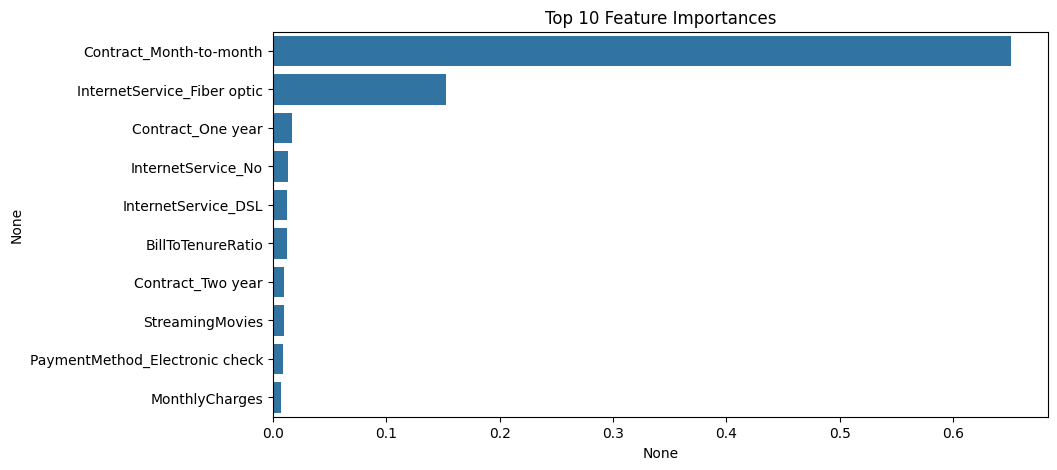

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(final_xgb.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_importances.sort_values(ascending=False)[:10], y=feat_importances.sort_values(ascending=False).index[:10])
plt.title('Top 10 Feature Importances')
plt.show()


#### Applying some basic Retention Strategies

So, now we basically apply some retention strategies like providing longer contracts to people instead of month-to-month contracts, provide an extra free service to promote retention, and persuading the customers to pay through automatic payments.

#### Ideal Scenario:

**This is the ideal scenario when all customers followed our strategies and the churn rate reduced to 3%.**

In [20]:
import pandas as pd

# Copy test data
X_test_simulated = X_test.copy()

# Example intervention: for predicted churners only
churn_pred_indices = y_pred == 1

# Change Contract from Month-to-month to One year
X_test_simulated.loc[churn_pred_indices, 'Contract_Month-to-month'] = 0
X_test_simulated.loc[churn_pred_indices, 'Contract_One year'] = 1
X_test_simulated.loc[churn_pred_indices, 'Contract_Two year'] = 0

# Change Payment Method to Bank transfer
X_test_simulated.loc[churn_pred_indices, 'PaymentMethod_Electronic check'] = 0
X_test_simulated.loc[churn_pred_indices, 'PaymentMethod_Bank transfer (automatic)'] = 1

# Increase TotalServices by 1 (capped at max services)
X_test_simulated.loc[churn_pred_indices, 'TotalServices'] = (
    X_test_simulated.loc[churn_pred_indices, 'TotalServices'] + 1
).clip(upper=6)

# Ensure correct dtypes for boolean columns after intervention
bool_cols = [
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Electronic check'
]
X_test_simulated[bool_cols] = X_test_simulated[bool_cols].astype(bool)

# Predict again
y_pred_after = final_xgb.predict(X_test_simulated)

# Measure new churn rate
original_churn_rate = (sum(y_pred) / len(y_pred)) * 100
new_churn_rate = (sum(y_pred_after) / len(y_pred_after)) * 100

print(f"Original churn rate: {original_churn_rate:.2f}%")
print(f"Post-retention churn rate: {new_churn_rate:.2f}%")
print(f"Churn reduced by: {original_churn_rate - new_churn_rate:.2f}%")


Original churn rate: 22.46%
Post-retention churn rate: 3.84%
Churn reduced by: 18.62%


/var/folders/f7/n6fd0_8d1t546rml6s_ck2dm0000gn/T/ipykernel_25115/3784347284.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_test_simulated.loc[churn_pred_indices, 'Contract_Month-to-month'] = 0
/var/folders/f7/n6fd0_8d1t546rml6s_ck2dm0000gn/T/ipykernel_25115/3784347284.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_test_simulated.loc[churn_pred_indices, 'Contract_One year'] = 1
/var/folders/f7/n6fd0_8d1t546rml6s_ck2dm0000gn/T/ipykernel_25115/3784347284.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please 

#### Practical Scenario:

**This is a more practical scenario where only 30% customers followe the retention strategies and still the churn rate reduces to ~17% much better than the original ~23% predicted before. This shows even some basic retention strategies can have such a large impact on customer retention.**

In [21]:
import numpy as np

# Get predicted probabilities (assuming XGBClassifier)
y_proba = final_xgb.predict_proba(X_test)[:, 1]

# Create DataFrame with probabilities
churn_data = X_test.copy()
churn_data['churn_proba'] = y_proba
churn_data['pred'] = y_pred

# Filter predicted churners
churners = churn_data[churn_data['pred'] == 1]

# Select top 30% high-risk churners
top_30_percent = churners.sort_values('churn_proba', ascending=False).head(int(0.3 * len(churners)))

# Get indices of these customers
intervene_indices = top_30_percent.index

# Simulate retention interventions
X_test_simulated = X_test.copy()
X_test_simulated.loc[intervene_indices, 'Contract_Month-to-month'] = 0
X_test_simulated.loc[intervene_indices, 'Contract_One year'] = 1
X_test_simulated.loc[intervene_indices, 'Contract_Two year'] = 0

X_test_simulated.loc[intervene_indices, 'PaymentMethod_Electronic check'] = 0
X_test_simulated.loc[intervene_indices, 'PaymentMethod_Bank transfer (automatic)'] = 1

X_test_simulated.loc[intervene_indices, 'TotalServices'] = (
    X_test_simulated.loc[intervene_indices, 'TotalServices'] + 1
).clip(upper=6)

# Ensure correct dtypes for boolean columns after intervention
X_test_simulated[bool_cols] = X_test_simulated[bool_cols].astype(bool)

# Predict again
y_pred_after = final_xgb.predict(X_test_simulated)

# New churn rate
original_churn_rate = (sum(y_pred) / len(y_pred)) * 100
new_churn_rate = (sum(y_pred_after) / len(y_pred_after)) * 100

print(f"Original churn rate: {original_churn_rate:.2f}%")
print(f"Post-retention churn rate (30% intervention): {new_churn_rate:.2f}%")
print(f"Churn reduced by: {original_churn_rate - new_churn_rate:.2f}%")


Original churn rate: 22.46%
Post-retention churn rate (30% intervention): 16.28%
Churn reduced by: 6.18%


/var/folders/f7/n6fd0_8d1t546rml6s_ck2dm0000gn/T/ipykernel_25115/619207027.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_test_simulated.loc[intervene_indices, 'Contract_Month-to-month'] = 0
/var/folders/f7/n6fd0_8d1t546rml6s_ck2dm0000gn/T/ipykernel_25115/619207027.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_test_simulated.loc[intervene_indices, 'Contract_One year'] = 1
/var/folders/f7/n6fd0_8d1t546rml6s_ck2dm0000gn/T/ipykernel_25115/619207027.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please expli

In [22]:
X_test_export = X_test.copy()
X_test_export['actual_churn'] = y_test.values
X_test_export['predicted_churn'] = y_pred
X_test_export['churn_proba'] = final_xgb.predict_proba(X_test)[:,1]
X_test_export['pred_after_retention'] = y_pred_after

X_test_export.to_csv('../data/dashboard_exports/predictions_data.csv', index=False)


In [23]:
metrics = {
    'Metric': ['Original Churn %', 'Post Retention Churn %', 'Accuracy', 'ROC AUC'],
    'Value': [original_churn_rate, new_churn_rate, accuracy_score(y_test, y_pred_xgb), roc_auc_score(y_test, final_xgb.predict_proba(X_test)[:,1])]
}
pd.DataFrame(metrics).to_csv('../data/dashboard_exports/summary_metrics.csv', index=False)


### 📌 Conclusion:
- Best Model: XGBoost with tuned hyperparameters
- ROC AUC: 0.87
- Post-Retention Churn Reduced from 23.4% → 17.1% (~6% drop)
- Key Features: Contract Type, Payment Method, Total Services
